In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

print(f"Dataset shape: {df.shape}")

Dataset shape: (8693, 14)


In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


Missing values per column:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


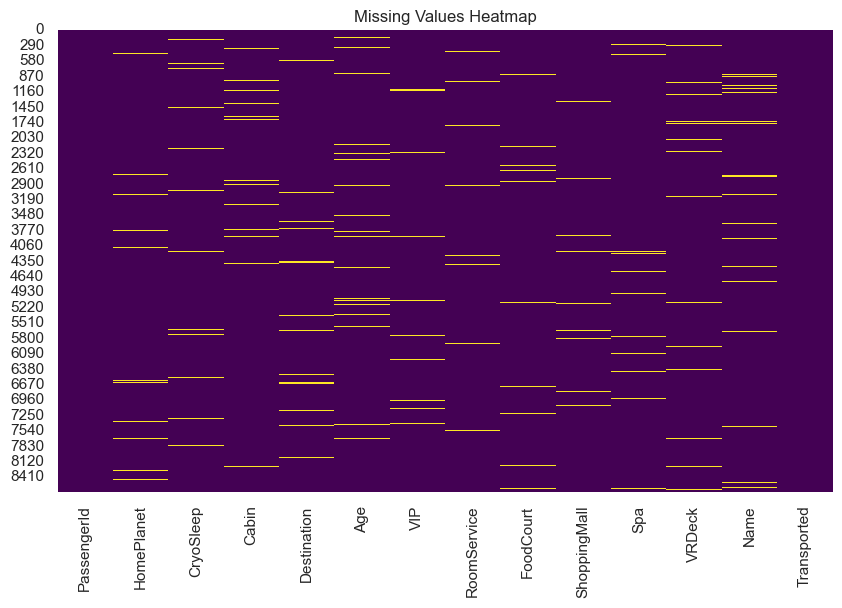

In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
df_cleaned = df.dropna()
print(f"Shape after dropping missing values: {df_cleaned.shape}")

df_filled = df.fillna(df.mean(numeric_only=True))

Shape after dropping missing values: (6606, 14)


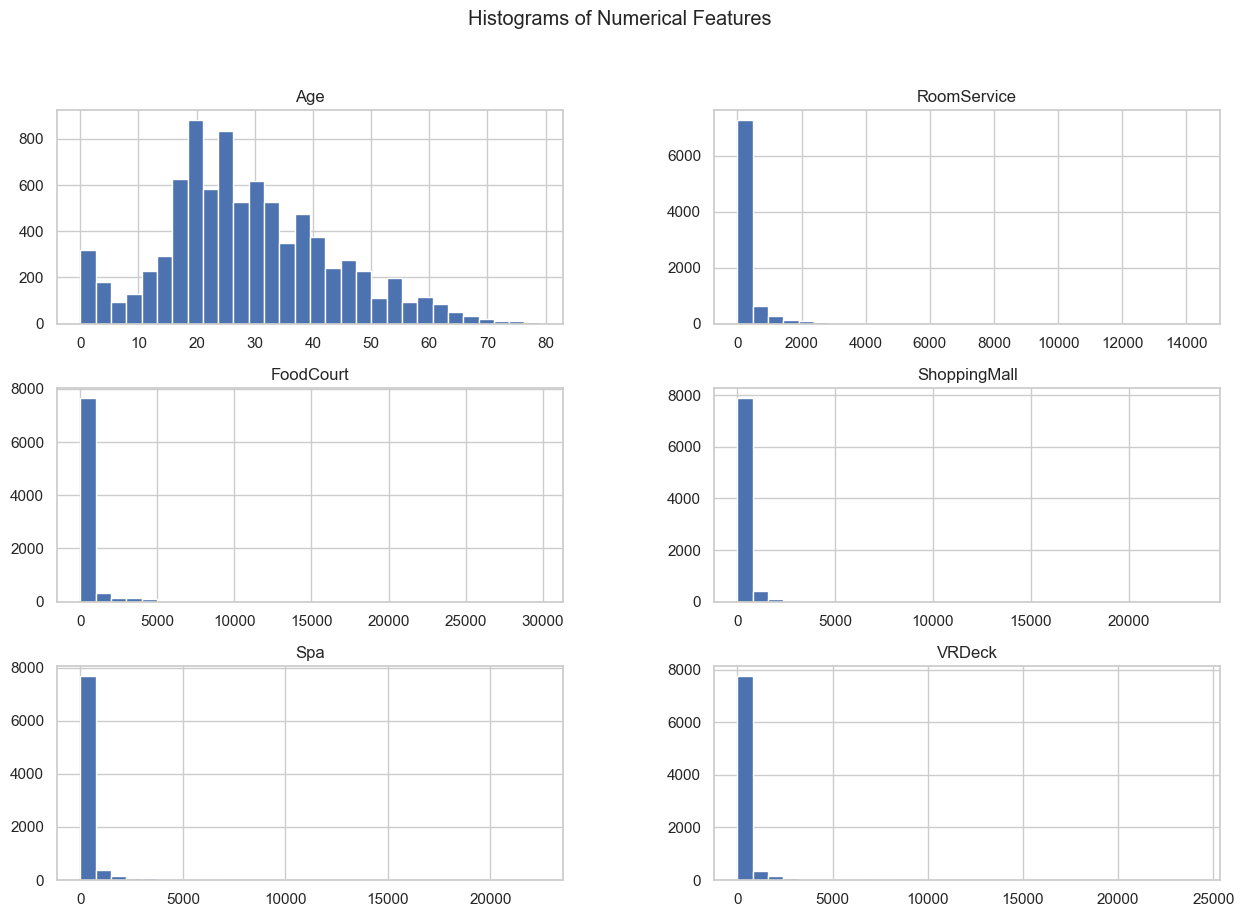

In [8]:
df.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

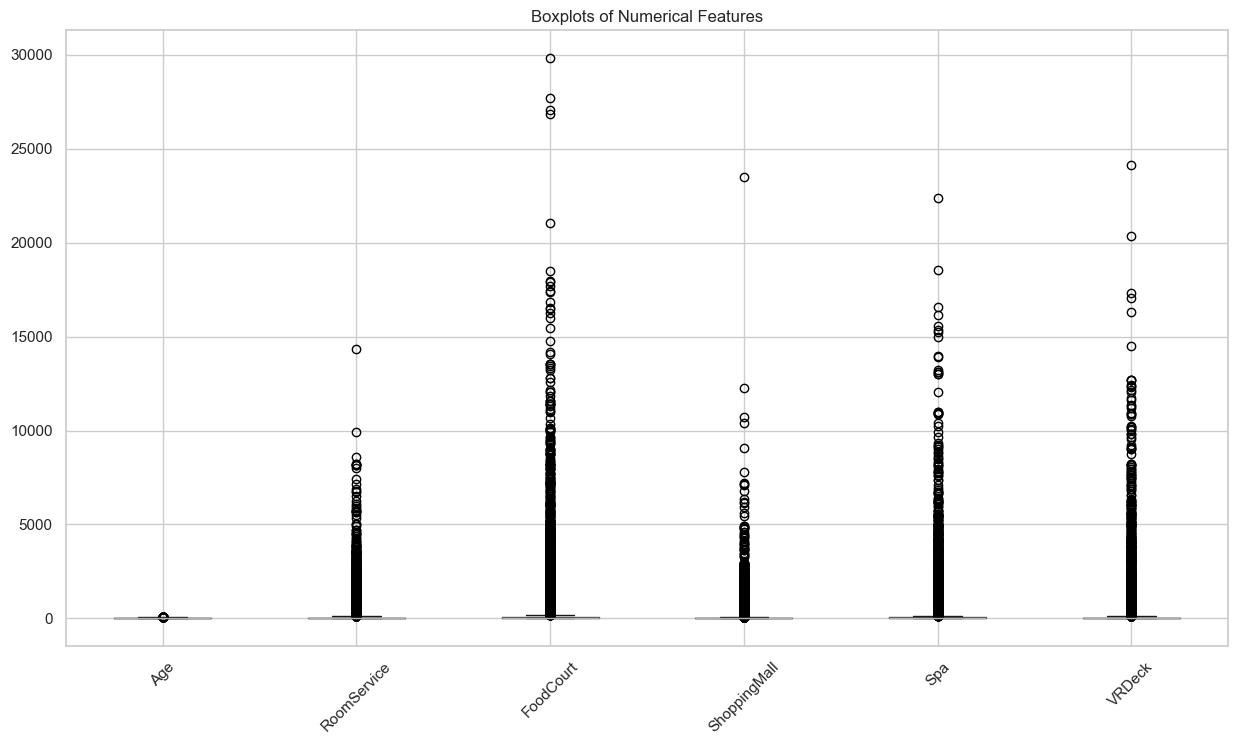

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [10]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for PassengerId:
PassengerId
9280_02    1
0001_01    1
0002_01    1
0003_01    1
0003_02    1
          ..
0008_01    1
0007_01    1
0006_02    1
0006_01    1
0005_01    1
Name: count, Length: 8693, dtype: int64

Value counts for HomePlanet:
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Value counts for CryoSleep:
CryoSleep
False    5439
True     3037
Name: count, dtype: int64

Value counts for Cabin:
Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64

Value counts for Destination:
Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

Value counts for VIP:
VIP
False    8291
True      199
Name: count, dtype: int64

Value counts for Name:
Name
Anton Woody          2
Apix Wala            2
Glenna Valezaley     2
Sharie Gallenry      2
Juane P

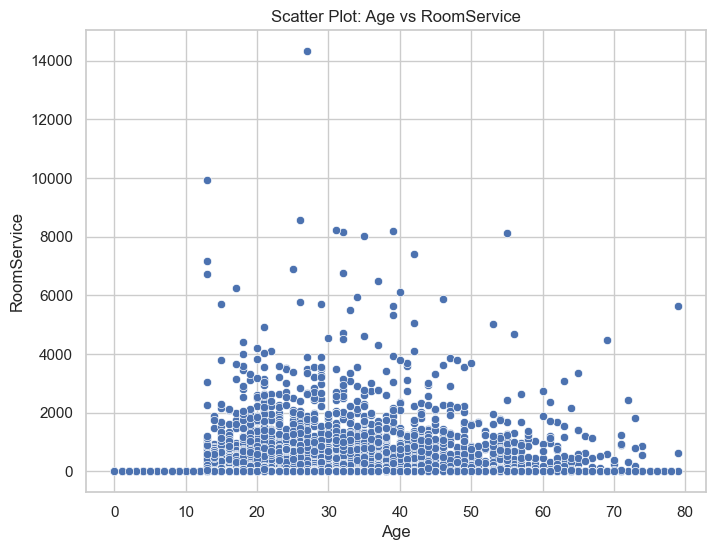

In [11]:
if len(numerical_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=numerical_cols[0], y=numerical_cols[1], data=df)
    plt.title(f'Scatter Plot: {numerical_cols[0]} vs {numerical_cols[1]}')
    plt.show()

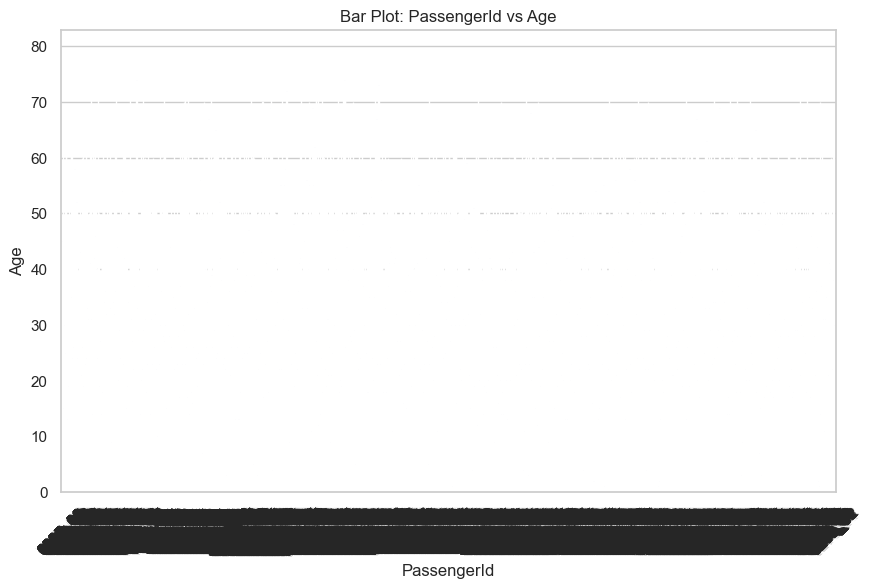

In [12]:
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_cols[0], y=numerical_cols[0], data=df)
    plt.title(f'Bar Plot: {categorical_cols[0]} vs {numerical_cols[0]}')
    plt.xticks(rotation=45)
    plt.show()

In [13]:
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    group_means = df.groupby(categorical_cols[0])[numerical_cols[0]].mean()
    print(f"\nMean of {numerical_cols[0]} by {categorical_cols[0]}:\n", group_means)


Mean of Age by PassengerId:
 PassengerId
0001_01    39.0
0002_01    24.0
0003_01    58.0
0003_02    33.0
0004_01    16.0
           ... 
9276_01    41.0
9278_01    18.0
9279_01    26.0
9280_01    32.0
9280_02    44.0
Name: Age, Length: 8693, dtype: float64


In [14]:
corr_matrix = df.corr(numeric_only=True)
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                    Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000  


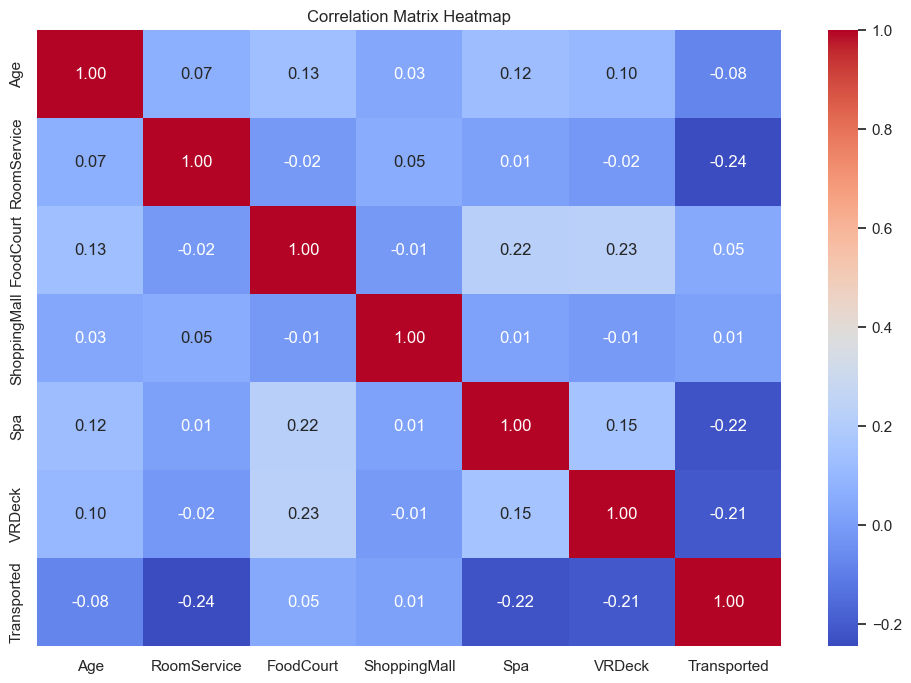

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

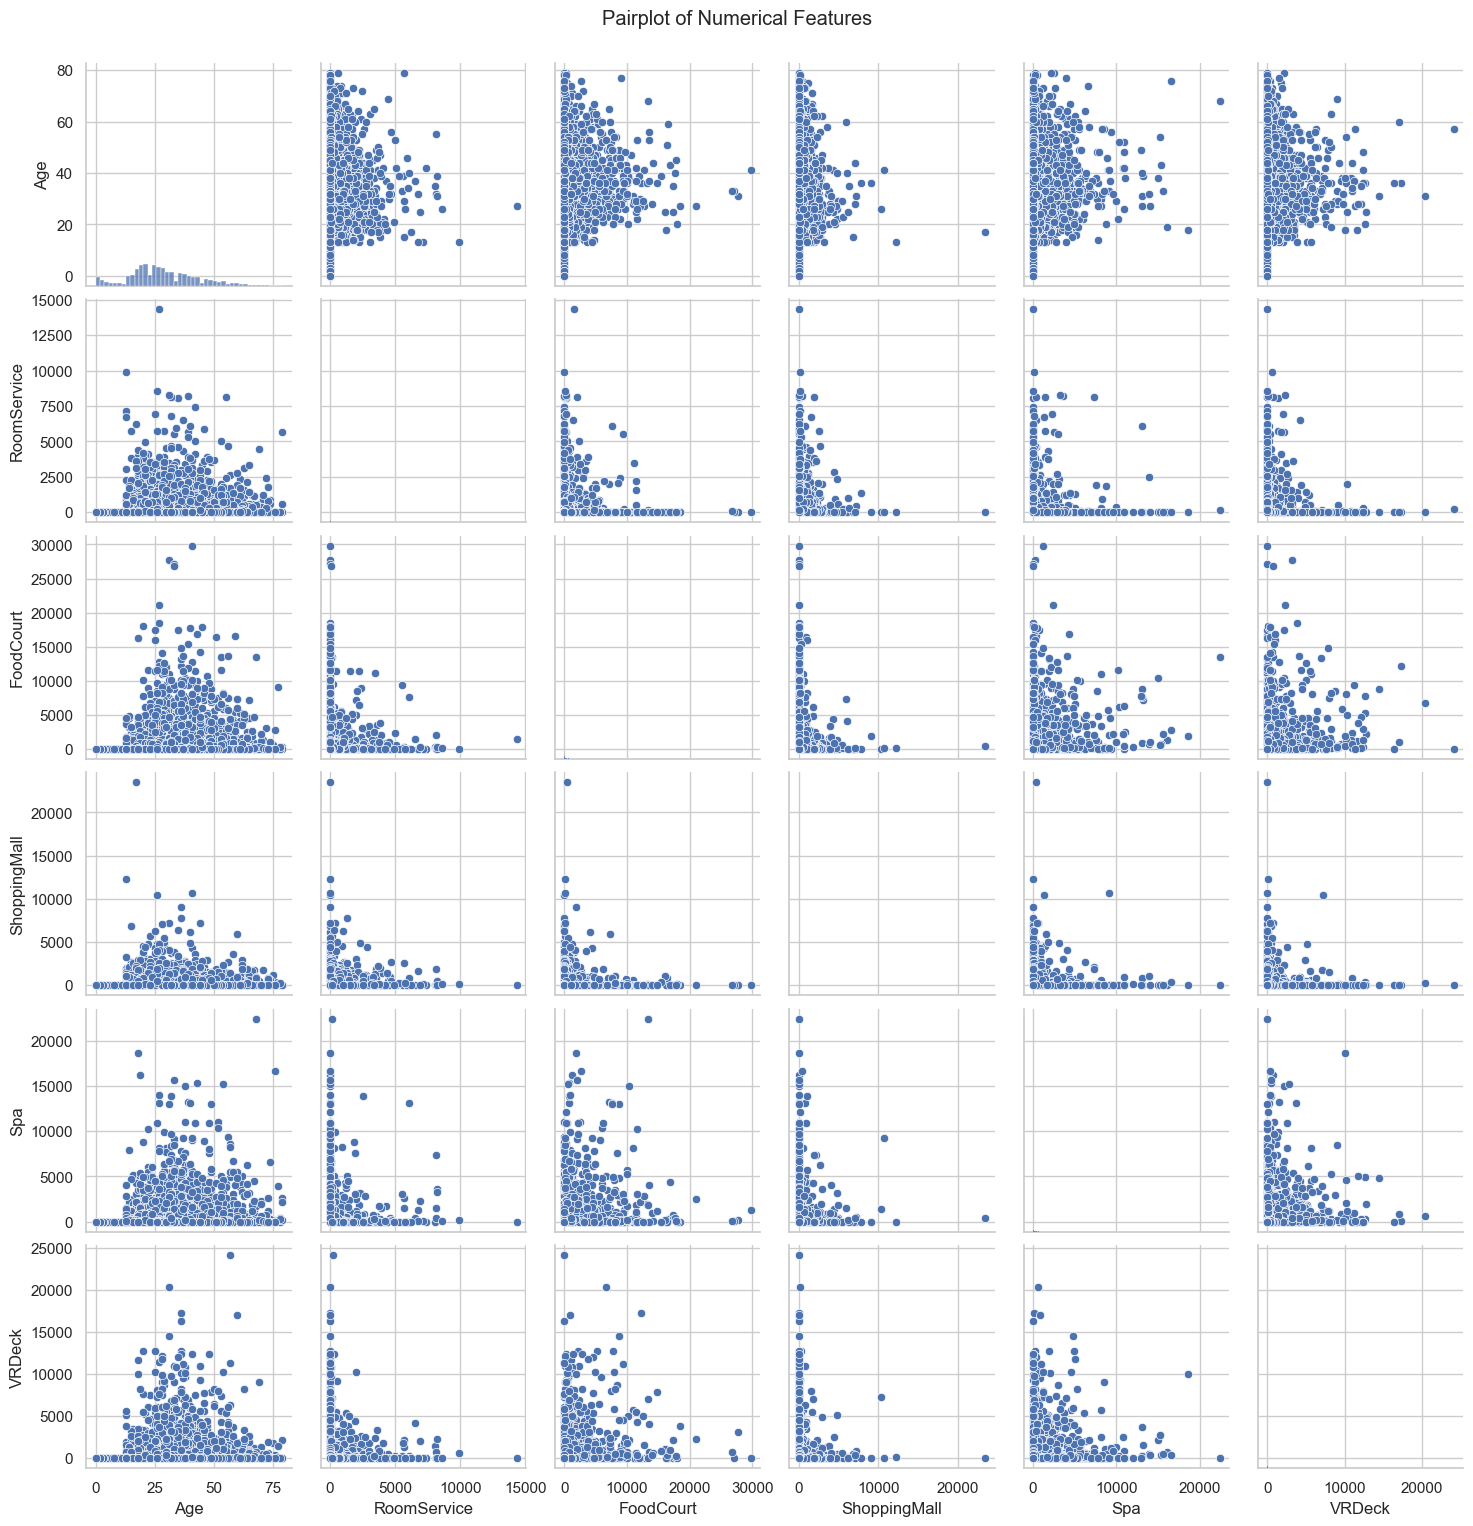

In [16]:
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

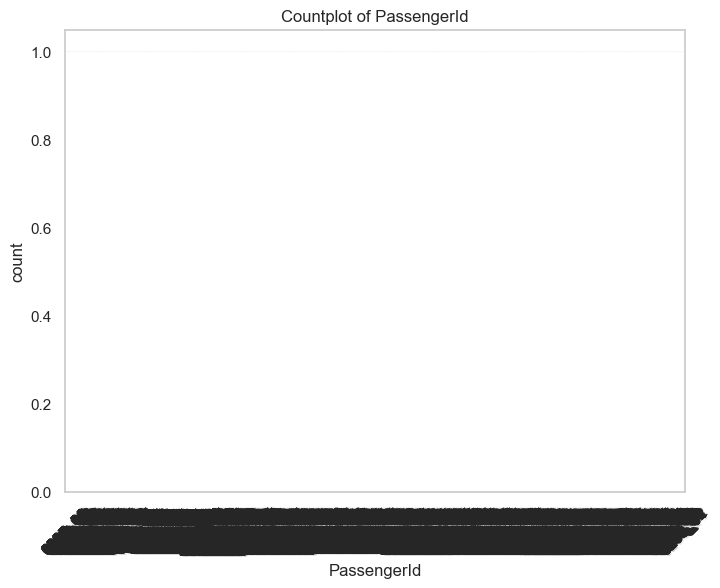

In [17]:
if len(categorical_cols) > 0:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=categorical_cols[0], data=df)
    plt.title(f'Countplot of {categorical_cols[0]}')
    plt.xticks(rotation=45)
    plt.show()